In [1]:
import pandas as pd
import numpy as np
import statistics as sts
import matplotlib.pyplot as plt

# Read Date

In [2]:
path='data/final_data.csv'
df_data=pd.read_csv(path,encoding ='UTF-8')
df=df_data.copy()
df

,Unnamed: 0,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,is_food
0,1,7,27,Jinsei Sushi,4.7,63,"Sushi, Asian, Japanese",1,"1830 29th Ave S, Birmingham, AL, 35209",35209,33.480440,-86.790440,1
1,2,14,51,Panera 521 Fieldstown Road,4.6,44,"Breakfast and Brunch, salad, Sandwich, Family ...",1,"521 Fieldstown Road, Gardendale, AL, 35071",35071,33.651407,-86.819247,0
2,3,16,88,Jeni's Splendid Ice Cream Pepper Place,5.0,20,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",3,"219 29th St S, Birmingham, AL, 35233",35233,33.516600,-86.789950,1
3,4,19,30,Falafel Cafe,4.9,48,"Middle Eastern, Mediterranean, Vegetarian, Gre...",1,"401 19th St S, Birmingham, AL, 35233",35233,33.508353,-86.803170,1
4,5,20,40,MrBeast Burger 838 Odum Road,3.7,19,"American, Burgers, Sandwich",2,"838 Odum Road, Gardendale, AL, 35071",35071,33.645480,-86.826260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19113,19114,40223,54,Mangia la pasta! 5610 N Interstate Hwy 35,4.8,500,"Pasta, Comfort Food, Italian, Group Friendly",1,"5610 N I35, Austin, TX, 78751",78751,30.316248,-97.708441,0
19114,19115,40224,53,Wholly Cow Burgers S Lamar,4.6,245,"American, Burgers, Breakfast and Brunch, Aller...",1,"3010 S Lamar Blvd, Austin, TX, 78704",78704,30.242816,-97.783821,1
19115,19116,40225,52,EurAsia Ramen 3,4.7,293,"Sushi, Asian, Japanese, Exclusive to Eats, Gro...",1,"5222 Burnet Road, Austin, TX, 78756",78756,30.324290,-97.740200,0
19116,19117,40226,51,Austin's Habibi 5th St,4.7,208,"Mediterranean, Gluten Free Friendly, Allergy F...",2,"817 W 5th St, Austin, TX, 78703",78703,30.269580,-97.753110,0


# Mean of three Type

In [3]:
import statistics as sts
A=df.score
print('mean is',sts.mean(A))
print('geometric mean is',sts.geometric_mean(A))
print('harmonic mean is',sts.harmonic_mean(A))
print('mode is',sts.mode(A))
print('median is',sts.median(A))
print('The third quartile is',sts.quantiles(A,n=4))
print('The second quartile is',sts.quantiles(A,n=3))

mean is 4.558437075007846
geometric mean is 4.547872946039448
harmonic mean is 4.536035669680859
mode is 4.7
median is 4.6
The third quartile is [4.4, 4.6, 4.8]
The second quartile is [4.5, 4.7]


# Boxplot

([<matplotlib.axis.XTick at 0x12fec67f0>], [Text(1, 0, 'sample')])

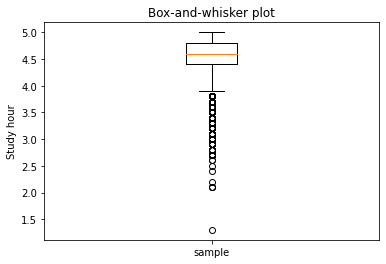

In [4]:
import matplotlib.pyplot as plt
#plt.boxplot(df['Hours'].values)
plt.boxplot(A)
plt.title('Box-and-whisker plot')
plt.ylabel('Study hour')
plt.xticks([1],["sample"])

# Chebyshev’s Theorem

In [5]:
#Task 7.1
import statistics as sts
print('Chebyshev’s Theorem tells the range where at least 8/9 of the data lie within 3 x std')
print('lower limit = mean - 3 x std, i.e.,', sts.mean(df['score'].values)-3 * sts.stdev(df['score'].values))
print('lower limit is adjusted to 0, as the score can not go below 0')
print('Upper limit = mean + 3 x std, i.e.,', sts.mean(df['score'].values)+3 * sts.stdev(df['score'].values))
print('Upper limit is adjusted to 100, as the score can not go beyond 100')
#print('Chebyshev’s Theorem is over conservative, does not help us understand the spread of data too much')

Chebyshev’s Theorem tells the range where at least 8/9 of the data lie within 3 x std
lower limit = mean - 3 x std, i.e., 3.6698066619586243
lower limit is adjusted to 0, as the score can not go below 0
Upper limit = mean + 3 x std, i.e., 5.447067488057067
Upper limit is adjusted to 100, as the score can not go beyond 100


# CDF PDF Graph

In [6]:
import math
import scipy.integrate as integrate
import numpy as np
def mydefined_CDF_StandardNormal(x):
    #integrate.quad 定积分
    #lambda 隐藏函数
    return integrate.quad(lambda x: (1/math.sqrt(2*math.pi))*math.exp(-x**2/2),-np.inf,x)

def mydefined_PDF_Normal(mu_par,sigma_par,x):
    return  1/(sigma_par*math.sqrt(2*math.pi))*math.exp(-(x-mu_par)**2/(2*sigma_par**2))

Text(0.5, 1.0, 'PDF of normal distribution')

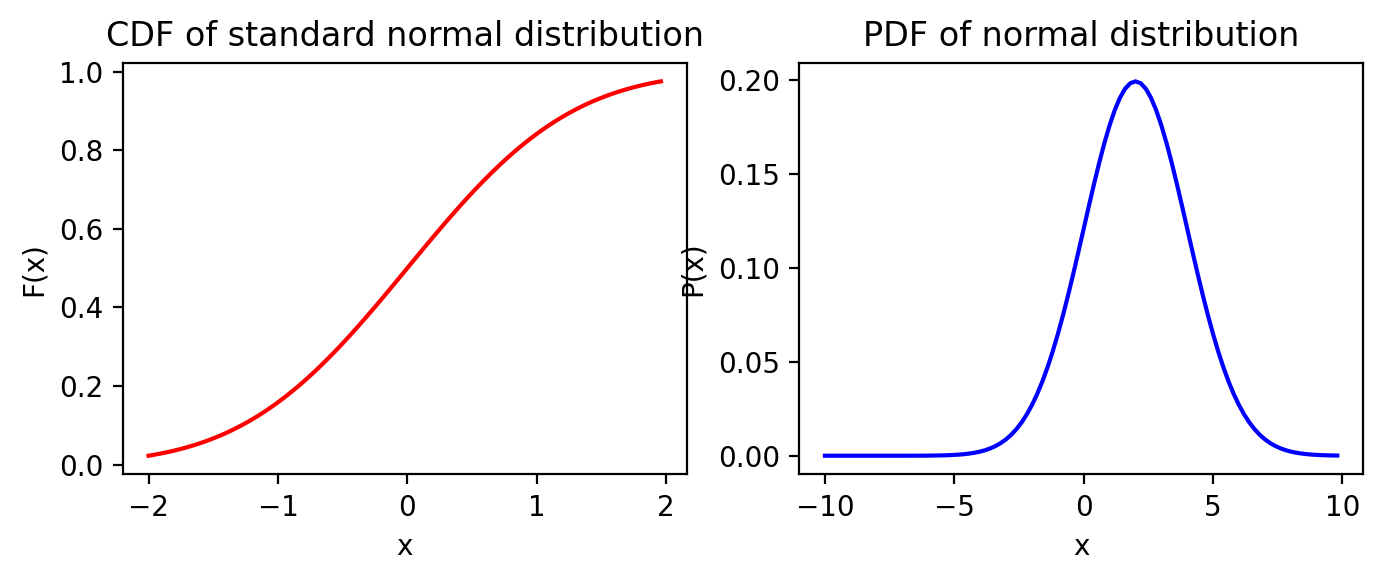

In [7]:
#Task 7.2
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6), dpi=200)
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)

CDF_Point = np.zeros((100,1))
x_point = np.zeros((100,1))
for i in range(0,100):
    x_point[i]=-2+4/100*i
    CDF_Point[i]=mydefined_CDF_StandardNormal(x_point[i])[0]
ax1.plot(x_point,CDF_Point, linestyle = 'solid',color ='red')
ax1.set_xlabel('x')
ax1.set_ylabel('F(x)')   
ax1.set_title('CDF of standard normal distribution')

PDF_Point = np.zeros((100,1))
x_point_t2 = np.zeros((100,1))
for i in range(0,100):
    x_point_t2[i]=-10+20/100*i
    PDF_Point[i]=mydefined_PDF_Normal(2,2,x_point_t2[i])
ax2.plot(x_point_t2,PDF_Point, linestyle = 'solid',color ='blue')
ax2.set_xlabel('x')
ax2.set_ylabel('P(x)') 
ax2.set_title('PDF of normal distribution')

# ***1.T-test***
## a) Use critical region approach to test whether restaurant's name contains food by using two-sided hypothesis $H_0: \mu_X=\mu_Y$ with type I error $\alpha = 0.05$.


Degree of freedom is 15183.612307250272
The lower critical value is -1.9601202357064098
The upper critical value is 1.9601202357064094
The test statistic is 8.259178615312482
The test statistic is in the critical region, null hypothesis is rejected 


/var/folders/zn/2h_jn9152knbzpbwpq843zr80000gn/T/ipykernel_99159/2982475418.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, sts.t.pdf(x, welch_test_df), 'r-', color='#77BFA3',alpha=0.6)  #Generate PDF of t-distribution with 12 degree of freedom. 12 is from welch_test_df


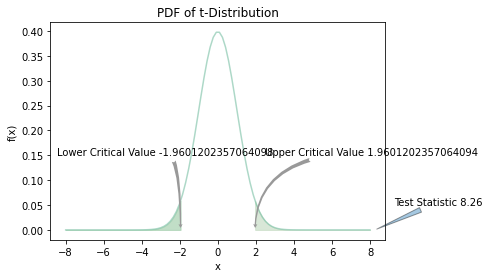

In [24]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np
import math

Sample_X=df[df.is_food == 1].score.values  #Construct two sample from the table above
Sample_Y=df[df.is_food == 0].score.values
len_X=len(Sample_X)
len_Y=len(Sample_Y)

welch_test_df=(np.var(Sample_X,ddof=1)/len_X+np.var(Sample_Y,ddof=1)/len_Y)**2/((np.var(Sample_X,ddof=1)/len_X)**2/(len_X-1)+(np.var(Sample_Y,ddof=1)/len_Y)**2/(len_Y-1)) #degree of freedom formula defined in welch test
print('Degree of freedom is', welch_test_df)
x = np.linspace(-8, 8, 100)#Return evenly spaced numbers over a specified interval between -8 and 8.
plt.plot(x, sts.t.pdf(x, welch_test_df), 'r-', color='#77BFA3',alpha=0.6)  #Generate PDF of t-distribution with 12 degree of freedom. 12 is from welch_test_df
plt.title('PDF of t-Distribution')
plt.ylabel('f(x)')
plt.xlabel('x')

C_value_L=sts.t.ppf(0.025, welch_test_df, loc=0, scale=1) #Compute lower critical value by using the inverse function of cdf of t-distribution with 12 degree of function
print('The lower critical value is', C_value_L)
x2= np.linspace(-8,C_value_L, 100) #Return evenly spaced numbers over a specified interval between -8 and lower critical value.
plt.fill_between(x2, sts.t.pdf(x2, welch_test_df), color='#98C9A3',alpha=0.6) #Generate a shaped area under the curve sts.t.pdf(x2, 12)

C_value_U=sts.t.ppf(0.975, welch_test_df, loc=0, scale=1) #compute upper critical value by using the inverse function of cdf of t-distribution with 12 degree of function
print('The upper critical value is', C_value_U)
x3= np.linspace(C_value_U,8, 100)#Return evenly spaced numbers over a specified interval between upper critical value and 8.
plt.fill_between(x3, sts.t.pdf(x3, welch_test_df), color='#BFD8BD',alpha=0.6) #Generate a shaped area under the curve sts.t.pdf(x3, 12)


plt.annotate(f'Lower Critical Value {C_value_L}',(C_value_L,0),(C_value_L-6.5,0.15),arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90")) #Annotation 

plt.annotate(f'Upper Critical Value {C_value_U}',(C_value_U,0),(C_value_U+0.5,0.15),arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90")) #Annotation 

test_statistic_value=np.abs(np.mean(Sample_X)-np.mean(Sample_Y))/np.sqrt(np.var(Sample_X,ddof=1)/len_X+np.var(Sample_Y,ddof=1)/len_Y) #compute test statistc
print('The test statistic is', test_statistic_value)
plt.annotate(f'Test Statistic {round(test_statistic_value,2)}',(test_statistic_value,0),(test_statistic_value+1,0.05),arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.4))  #Annotation 
print('The test statistic is in the critical region, null hypothesis is rejected ')

In [15]:
from IPython.display import display, Markdown, Latex
result_tTest=sts.ttest_ind(Sample_X,Sample_Y,alternative='two-sided',equal_var=False)
display(result_tTest)
print('The test statistic is a random variable, but for this sample, the value is', round(result_tTest[0],2))
display(Markdown('Null hypothesis is two-sided, $H_0: \mu_X=\mu_Y$'))
display(Markdown(f'Null hypothesis should be rejected, as p-value {round(result_tTest[1],2)} is smaller than type I error 0.05'))
display(Markdown('Alternative hypothesis is true, $H_a: \mu_X ≠ \mu_Y$'))

Ttest_indResult(statistic=-8.259178615312484, pvalue=1.5867440552946258e-16)

The test statistic is a random variable, but for this sample, the value is -8.26


Null hypothesis is two-sided, $H_0: \mu_X=\mu_Y$

Null hypothesis should be rejected, as p-value 0.0 is smaller than type I error 0.05

Alternative hypothesis is true, $H_a: \mu_X ≠ \mu_Y$

# ***2.Wilcoxon–Mann–Whitney  U-Test***


Text(0, 0.5, 'Counts')

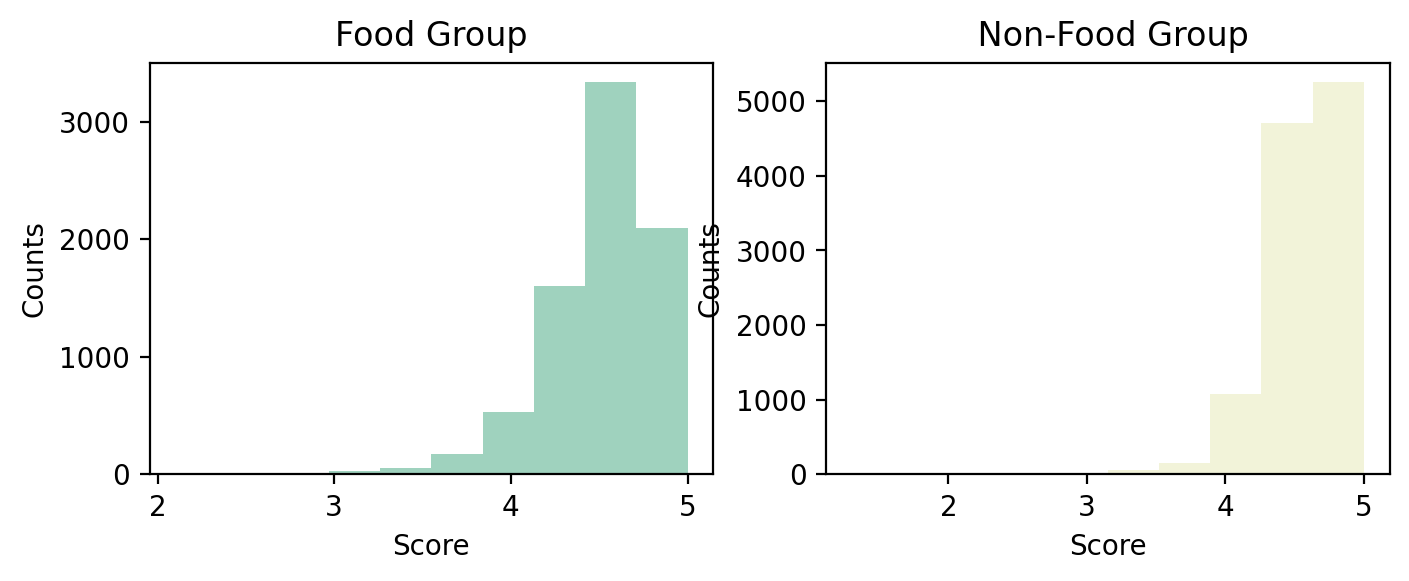

In [21]:
Sample_C=df[df.is_food == 1].score.values   #Construct two sample from the table above
Sample_W=df[df.is_food == 0].score.values
len_C=len(df[df.is_food == 1].score)
len_w=len(df[df.is_food == 1].score)


fig = plt.figure(figsize=(8, 6), dpi=200)  #Generate blank figure layout is 2 x 2, size 8 inch  x 6 inch, 200 dpi
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)

ax1.hist(Sample_C, color ='#77BFA3',alpha = 0.7) #Generate relative frequency histogram for coffee group
ax1.set_title('Food Group')
ax1.set_xlabel('Score')
ax1.set_ylabel('Counts')

ax2.hist(Sample_W, color ='#EDEEC9',alpha = 0.7) #Generate relative frequency histogram for water group
ax2.set_title(' Non-Food Group')
ax2.set_xlabel('Score')
ax2.set_ylabel('Counts')

In [25]:
print(sts.mannwhitneyu(Sample_C,Sample_W,alternative='two-sided')) #Use mannwhitneyu () to conduct WMW U test. par 1,2 are samples, par 3 is to specify the formulation of hypothesis
if sts.mannwhitneyu(Sample_C,Sample_W,alternative='two-sided')[1]>0.05:
    print('null hypothesis is retained')
else:
    print('null hypothesis is reject')

MannwhitneyuResult(statistic=41866156.5, pvalue=3.0956042979081e-10)
null hypothesis is reject


The test statistic is -428.103061118735
The lower critical value is -1.9599639845400545
The upper critical value is 1.959963984540054
The test statistic is not in the critical region, null hypothesis is retained 


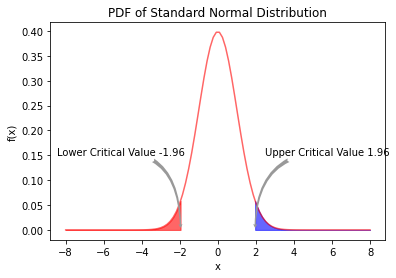

In [29]:
#Compute the sum of ranks for each sample
Sample_C=df[df.is_food == 1].score.values   #Construct two sample from the table above
Sample_W=df[df.is_food == 0].score.values
len_C=len(df[df.is_food == 1].score)
len_w=len(df[df.is_food == 1].score)

Mix_Sample=np.concatenate((Sample_C, Sample_W)) #merge two samples into a sample by np.concatenate()
Rank_loc_info=Mix_Sample.argsort() #sort the sample value from small to large
Rank_Plus_1=0
Rank_Plus_2=0
for i in range(0,len(Mix_Sample)):
    if Mix_Sample[Rank_loc_info[i]] in Sample_C:
        Rank_Plus_1=Rank_Plus_1+(i+1) #sum up the rank for sample C
    else:
        Rank_Plus_2=Rank_Plus_2+(i+1) #sum up the rank for sample W
#Compute parameters U_1 and U_2
U_1=len_C*len_w+(len_C*(len_C+1)/2)-Rank_Plus_1
U_2=len_C*len_w+(len_w*(len_w+1)/2)-Rank_Plus_2

#Compute test statistic
U=np.minimum(U_1,U_2)
test_stat= (U - len_w*len_C/2)/(np.sqrt(len_C*len_w*(len_C+len_w+1)/12))
print('The test statistic is', test_stat)


#Visualise critical region  
x = np.linspace(-8, 8, 100)#Return evenly spaced numbers over a specified interval between -8 and 8.
plt.plot(x, sts.norm.pdf(x,loc=0, scale=1), 'r-', alpha=0.6)  #Generate PDF of standard normal distribution
plt.title('PDF of Standard Normal Distribution')
plt.ylabel('f(x)')
plt.xlabel('x')

C_value_L=sts.norm.ppf(0.025, loc=0, scale=1) #Compute lower critical value by using the inverse function of cdf of standard normal distribution
print('The lower critical value is', C_value_L)
x2= np.linspace(-8,C_value_L, 100) #Return evenly spaced numbers over a specified interval between -8 and lower critical value.
plt.fill_between(x2, sts.norm.pdf(x2,loc=0, scale=1), color='red',alpha=0.6)

C_value_U=sts.norm.ppf(0.975, loc=0, scale=1)#Compute upper critical value by using the inverse function of cdf of standard normal distribution
print('The upper critical value is', C_value_U)
x3= np.linspace(C_value_U,8, 100) #Return evenly spaced numbers over a specified interval between upper critical value and 8.
plt.fill_between(x3, sts.norm.pdf(x3,loc=0, scale=1), color='blue',alpha=0.6)


plt.annotate(f'Lower Critical Value {round(C_value_L,2)}',(C_value_L,0),(C_value_L-6.5,0.15),arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

plt.annotate(f'Upper Critical Value {round(C_value_U,2)}',(C_value_U,0),(C_value_U+0.5,0.15),arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

plt.annotate(f'Test Statistic {round(test_stat,2)}',(test_stat,0),(test_stat+1,0.05),arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.4))
print('The test statistic is not in the critical region, null hypothesis is retained ')

# 3: $\chi^2$-Goodness-of-Fit Test

In [36]:
print(len(df[(df.is_food == 1) & (df.price_range == 1)]))
print(len(df[(df.is_food == 0) & (df.price_range > 1)]))
print(len(df[(df.is_food == 1) & (df.price_range > 1)]))
print(len(df[(df.is_food == 0) & (df.price_range == 1)]))


5954
2685
1885
8594


In [40]:
from IPython.display import display, Markdown, Latex
len_FoodLow=len(df[(df.is_food == 1) & (df.price_range == 1)])
len_NonFoodLow=len(df[(df.is_food == 0) & (df.price_range == 1)])
len_FoodHigh=len(df[(df.is_food == 1) & (df.price_range > 1)])
len_NonFoodHigh=len(df[(df.is_food == 0) & (df.price_range > 1)])
Num_OB=np.array([len_FoodLow,len_NonFoodLow,len_FoodHigh,len_NonFoodHigh]) #array for observed absolute freq
Total_OB=np.sum(Num_OB)
P_O=np.array([len_FoodLow/Total_OB,len_NonFoodLow/Total_OB,len_FoodHigh/Total_OB,len_NonFoodHigh/Total_OB])*Total_OB #array for expected absolute freq 


display(sts.chisquare(Num_OB,P_O)) #Use mannwhitneyu () to conduct chi2goodness of fit test. par 1,2 are observed/expected absolute freq
print('The test statistic is a random variable, but for this sample, the value is', sts.chisquare(Num_OB,P_O)[0])
display(Markdown('Null hypothesis is two-sided, $H_0: H_0: P(X = i) = p_i$'))
display(Markdown('Null hypothesis should be retained'))

Power_divergenceResult(statistic=1.389285543421276e-28, pvalue=1.0)

The test statistic is a random variable, but for this sample, the value is 1.389285543421276e-28


Null hypothesis is two-sided, $H_0: H_0: P(X = i) = p_i$

Null hypothesis should be retained

The lower critical value is 0.21579528262389785
The upper critical value is 9.348403604496148
The test statistic is 1.389285543421276e-28
The test statistic is NOT in the critical region, null hypothesis should be retained 


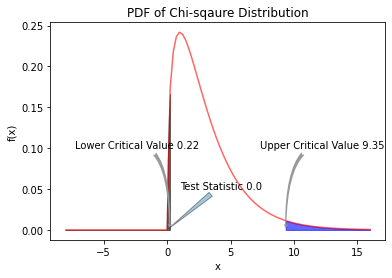

In [39]:
#Visualise critical region  
x = np.linspace(-8, 16, 100)
plt.plot(x, sts.chi2.pdf(x, len(Num_OB)-1,loc=0, scale=1), 'r-', alpha=0.6)
plt.title('PDF of Chi-sqaure Distribution')
plt.ylabel('f(x)')
plt.xlabel('x')


C_value_L=sts.chi2.ppf(0.025, len(Num_OB)-1, loc=0, scale=1)
print('The lower critical value is', C_value_L)
x2= np.linspace(-8,C_value_L, 100)
plt.fill_between(x2, sts.chi2.pdf(x2, len(Num_OB)-1,loc=0, scale=1), color='black',alpha=0.6)

C_value_U=sts.chi2.ppf(0.975, len(Num_OB)-1,loc=0, scale=1)
print('The upper critical value is', C_value_U)
x3= np.linspace(C_value_U,16, 100)
plt.fill_between(x3, sts.chi2.pdf(x3,len(Num_OB)-1, loc=0, scale=1), color='blue',alpha=0.6)

plt.annotate(f'Lower Critical Value {round(C_value_L,2)}',(C_value_L,0),(C_value_L-7.5,0.1),arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

plt.annotate(f'Upper Critical Value {round(C_value_U,2)}',(C_value_U,0),(C_value_U-2,0.1),arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

test_statistic_value=0
for i in range(4):
    test_statistic_value=test_statistic_value+(Num_OB[i]-P_O[i])**2/P_O[i]
print('The test statistic is', test_statistic_value)
plt.annotate(f'Test Statistic {round(test_statistic_value,2)}',(test_statistic_value,0),(test_statistic_value+1,0.05),arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.4))
print('The test statistic is NOT in the critical region, null hypothesis should be retained ')

# 4.1: One-way ANOVA

number of price's data are too small 

# 4.2: Two-way ANOVA

/var/folders/zn/2h_jn9152knbzpbwpq843zr80000gn/T/ipykernel_99159/1032809969.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)
/var/folders/zn/2h_jn9152knbzpbwpq843zr80000gn/T/ipykernel_99159/1032809969.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels)


Text(0, 0.5, 'Marginal Mean of Temperature')

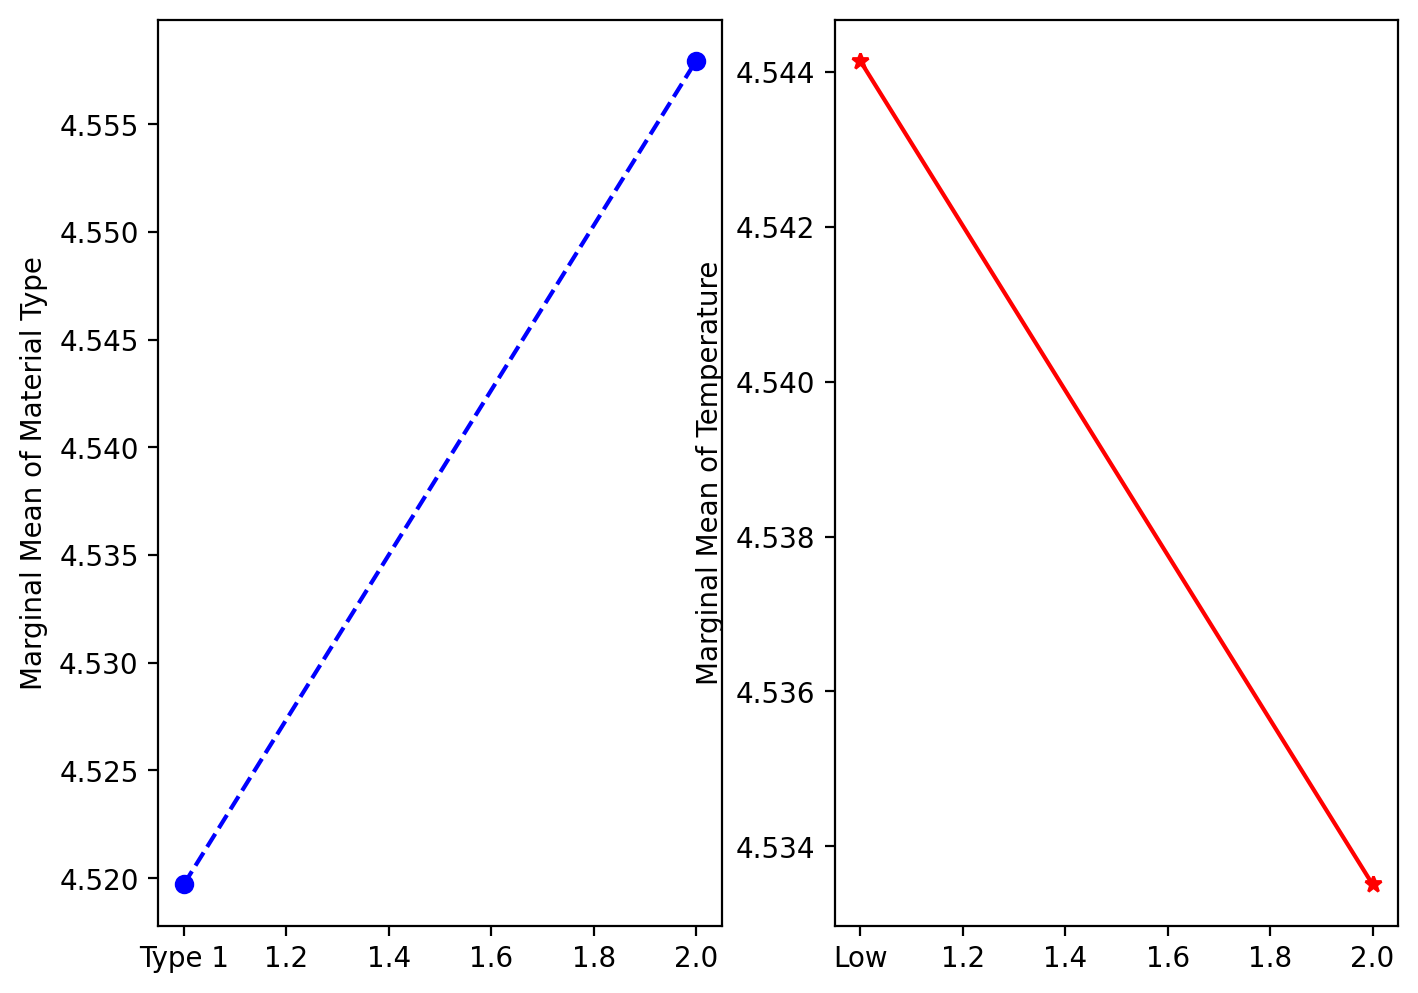

In [52]:
# construct one dataframe object for each combination of factor A group and factor B group
# in total, 9 combinations for this experiment
import pandas as pd

# construct a dataframe object for each combination
df1 = pd.DataFrame(
    {'Food-Low': df[(df.is_food == 1) & (df.price_range == 1)].score.values})
df2 = pd.DataFrame(
    {'Food-High': df[(df.is_food == 1) & (df.price_range > 1)].score.values})
df3 = pd.DataFrame(
    {'NonFood-Low': df[(df.is_food == 0) & (df.price_range == 1)].score.values})
df4 = pd.DataFrame(
    {'NonFood-High': df[(df.is_food == 0) & (df.price_range > 1)].score.values})
# merge all dataframe objects
dataframe_ob_two = pd.concat([df1, df2, df3, df4], axis=1)
dataframe_ob_two = dataframe_ob_two.loc[:1800]
# compute the marginal mean for each material type, for M1, compute average of combinations M1-Low, M1-med, and M1-high
# for M2, compute average of combinations M2-Low, M2-med, and M2-high
# for M3, compute average of combinations M3-Low, M3-med, and M3-high
Marginal_Mean_M1 = np.mean(np.concatenate(
    (dataframe_ob_two['Food-Low'].values, dataframe_ob_two['Food-High'].values), axis=None))
Marginal_Mean_M2 = np.mean(np.concatenate(
    (dataframe_ob_two['NonFood-Low'].values, dataframe_ob_two['NonFood-High'].values), axis=None))

# generate 8 in x 6 in plot, dpi=200
fig = plt.figure(figsize=(8, 6), dpi=200)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
# plot for marginal means of 3 material types
ax1.plot([1, 2], [Marginal_Mean_M1, Marginal_Mean_M2],
         linestyle='--', marker='o', color='b')


labels = [item.get_text() for item in ax1.get_xticklabels()]
labels[1] = 'Type 1'
labels[-1] = 'Type 2'

ax1.set_xticklabels(labels)
ax1.set_ylabel('Marginal Mean of Material Type')

# compute the marginal mean for temperature, for low, compute average of combinations M1-Low, M2-low, and M3-low
# for med, compute average of combinations M1-med, M2-med, and M3-med
# for high, compute average of combinations M1-high, M2-high, and M3-high
Marginal_Mean_Low = np.mean(np.concatenate(
    (dataframe_ob_two['Food-Low'].values, dataframe_ob_two['NonFood-Low'].values), axis=None))
Marginal_Mean_High = np.mean(np.concatenate(
    (dataframe_ob_two['Food-High'].values, dataframe_ob_two['NonFood-High'].values), axis=None))
# plot for marginal means of 3 levels of temperature
ax2.plot([1, 2], [Marginal_Mean_Low, Marginal_Mean_High],
         linestyle='-', marker='*', color='r')

labels = [item.get_text() for item in ax2.get_xticklabels()]
labels[1] = 'Low'
labels[-1] = 'High'

ax2.set_xticklabels(labels)
ax2.set_ylabel('Marginal Mean of Temperature')


In [54]:
#Compute degrees of freedom for SSA, SSB, SSAB and SSE
r=2
c=2
#SSA=r-1
dof_SSA=r-1
#SSB=c-1
dof_SSB=c-1
#SSAB=(𝑟−1)(𝑐−1)
dof_SSAB=(r-1)*(c-1)
#SSE=𝑟𝑐(𝑛' −1)
dof_SSE=r*c*(len(dataframe_ob_two)-1)

print('For factor material variation, degrees of freedom is', dof_SSA )
print('For factor temperature variation, degrees of freedom is', dof_SSB )
print('For interaction variation, degrees of freedom is', dof_SSAB )
print('For random variation, degrees of freedom is', dof_SSE )

For factor material variation, degrees of freedom is 1
For factor temperature variation, degrees of freedom is 1
For interaction variation, degrees of freedom is 1
For random variation, degrees of freedom is 7200


critical value is 3.8427506889103933
critical value is 3.8427506889103933
critical value is 3.8427506889103933


Text(3.5427506889103935, 0.15, 'Critical Value is 3.84')

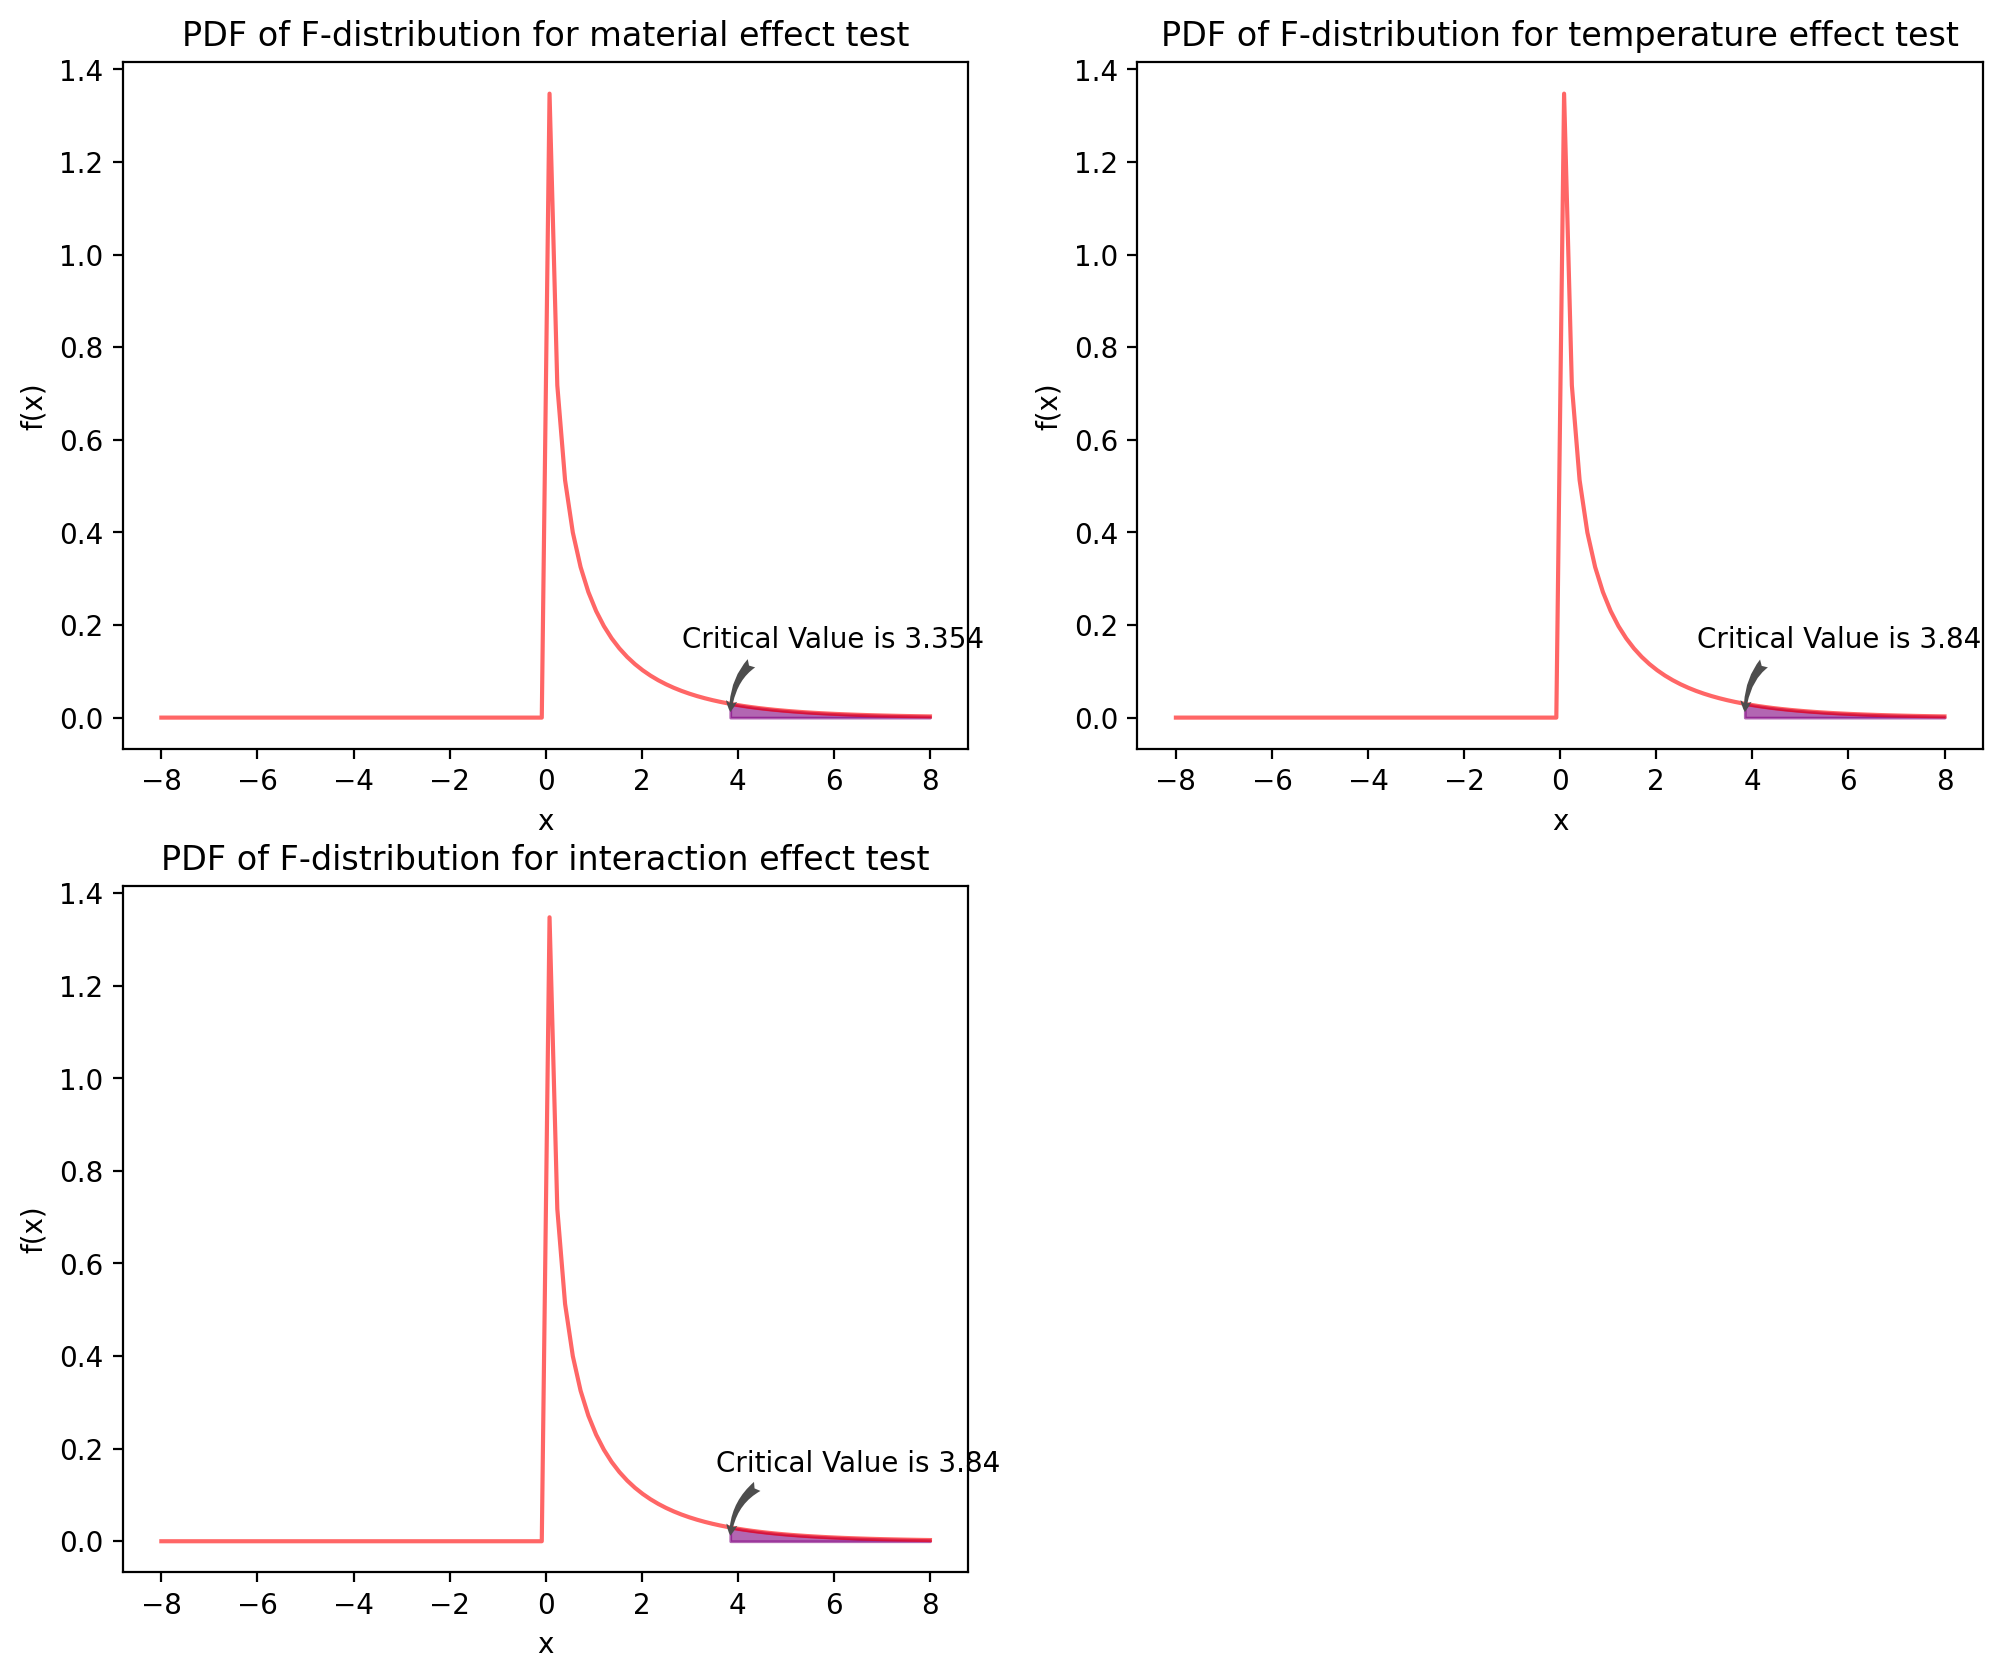

In [56]:
# Given a Type I error 5%, use the inverse function of CDF of F-distribution to compute critical value(s) of one-sided critical regions for factor and interaction effects

import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np

#generate a figure with size 12 in x 8 in and dpi=200
fig_two = plt.figure(figsize=(12, 10), dpi=200)
#the figure has 2 x 2 layout
ax1_two=fig_two.add_subplot(2,2,1)
ax2_two=fig_two.add_subplot(2,2,2)
ax3_two=fig_two.add_subplot(2,2,3)

#ax1 is the first subplot, showing the critical region of material effect test
x11 = np.linspace(-8, 8, 100)
ax1_two.plot(x11, sts.f.pdf(x11,dof_SSA, dof_SSE,loc=0, scale=1), 'r-', alpha=0.6)
ax1_two.set_title('PDF of F-distribution for material effect test')
ax1_two.set_ylabel('f(x)')
ax1_two.set_xlabel('x')

C_value_material=sts.f.ppf(0.95, dof_SSA, dof_SSE, loc=0, scale=1)
print('critical value is', C_value_material)
x12= np.linspace(C_value_material,8, 100)
ax1_two.fill_between(x12, sts.f.pdf(x12,dof_SSA, dof_SSE,loc=0, scale=1), color='purple',alpha=0.6)
ax1_two.annotate('Critical Value is 3.354',(C_value_material,0),(C_value_material-1,0.15),arrowprops=dict(arrowstyle="fancy",
                            fc="0.3", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

#ax2 is the second subplot, showing the critical region of temperature effect test
x21 = np.linspace(-8, 8, 100)
ax2_two.plot(x21, sts.f.pdf(x21,dof_SSB, dof_SSE,loc=0, scale=1), 'r-', alpha=0.6)
ax2_two.set_title('PDF of F-distribution for temperature effect test')
ax2_two.set_ylabel('f(x)')
ax2_two.set_xlabel('x')

C_value_temperature=sts.f.ppf(0.95, dof_SSB, dof_SSE, loc=0, scale=1)
print('critical value is', C_value_temperature)
x22= np.linspace(C_value_temperature,8, 100)
ax2_two.fill_between(x22, sts.f.pdf(x22,dof_SSB, dof_SSE,loc=0, scale=1), color='purple',alpha=0.6)
ax2_two.annotate(f'Critical Value is {round(C_value_temperature,2)}',(C_value_temperature,0),(C_value_temperature-1,0.15),arrowprops=dict(arrowstyle="fancy",
                            fc="0.3", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

#ax3 is the third subplot, showing the critical region of interaction effect test
x31 = np.linspace(-8, 8, 100)
ax3_two.plot(x31, sts.f.pdf(x31,dof_SSAB, dof_SSE,loc=0, scale=1), 'r-', alpha=0.6)
ax3_two.set_title('PDF of F-distribution for interaction effect test')
ax3_two.set_ylabel('f(x)')
ax3_two.set_xlabel('x')

C_value_interation=sts.f.ppf(0.95, dof_SSAB, dof_SSE, loc=0, scale=1)
print('critical value is', C_value_interation)
x32= np.linspace(C_value_interation,8, 100)
ax3_two.fill_between(x32, sts.f.pdf(x32,dof_SSAB, dof_SSE,loc=0, scale=1), color='purple',alpha=0.6)
ax3_two.annotate(f'Critical Value is {round(C_value_interation,2)}',(C_value_interation,0),(C_value_interation-0.3,0.15),arrowprops=dict(arrowstyle="fancy",
                            fc="0.3", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

In [66]:
# Calculate the test statistic for factor and interaction effects and make the decision.
Marginal_Mean_material = [Marginal_Mean_M1,Marginal_Mean_M2]
Marginal_Mean_temperature = [Marginal_Mean_Low,Marginal_Mean_High]

# because the sample sizes in all combination are 4, grand mean can be computed by using either marginal means for material or marginal means for temperature  
grand_mean_two=np.mean(Marginal_Mean_material)
# compute SSA 
SSA_material=0
for i in range(2):
    SSA_material=SSA_material+(Marginal_Mean_material[i]-grand_mean_two)**2
SSA_material=SSA_material*3*4

# compute SSB 
SSB_temperature=0
for j in range(2):
    SSB_temperature=SSB_temperature+(Marginal_Mean_temperature[j]-grand_mean_two)**2
SSB_temperature=SSB_temperature*3*4

# compute SSAB 
SSAB=0
for i in [0,2]:
    SSAB=SSAB+(np.mean(dataframe_ob_two.values[:,i])-Marginal_Mean_material[int(i/3)]-Marginal_Mean_temperature[0]+grand_mean_two)**2
    SSAB=SSAB+(np.mean(dataframe_ob_two.values[:,i+1])-Marginal_Mean_material[int(i/3)]-Marginal_Mean_temperature[1]+grand_mean_two)**2
SSAB=SSAB*4

# compute SSE
SSE=0
for i in range(2):
    for k in range(2):
        SSE=SSE+(dataframe_ob_two.values[k,i]-np.mean(dataframe_ob_two.values[:,i]))**2
        SSE=SSE+(dataframe_ob_two.values[k,i+1]-np.mean(dataframe_ob_two.values[:,i+1]))**2
            

# compute test statistic for material effect
test_statistic_material=(SSA_material/dof_SSA)/(SSE/dof_SSE)
print('The test statistic for material effect is', test_statistic_material)
print('reject null hypothesis')
# compute test statistic for temperature effect 
test_statistic_temperature=(SSB_temperature/dof_SSB)/(SSE/dof_SSE)
print('The test statistic for temperature effect  is', test_statistic_temperature)
print('reject null hypothesis')

# compute test statistic for interation effect 
test_statistic_interation=(SSAB/dof_SSAB)/(SSE/dof_SSE)
print('The test statistic for interation effect  is', test_statistic_interation)
print('reject null hypothesis')

print('there is strong evidence that the mean battery life varies with material and temperature factors')
print('battery life changes for different materials depends on both temperature and material')

The test statistic for material effect is 32.395758494582736
reject null hypothesis
The test statistic for temperature effect  is 2.5062120867370443
reject null hypothesis
The test statistic for interation effect  is 49.86013858837204
reject null hypothesis
there is strong evidence that the mean battery life varies with material and temperature factors
battery life changes for different materials depends on both temperature and material


In [67]:
# two factor effect are significant,so we perform Tukey-Kramer procedure.
# Step 1: Compute pairwise absolute difference between marginal sample means of factors material and temperature
Pair_Diff_material=np.zeros((2,2))
Pair_Diff_temperature=np.zeros((2,2))
#compute the pairwise absolute difference for distinctive pairs
for i in range(2):
    for j in range(2):
        if  i > j :
            Pair_Diff_material[i,j]=abs(Marginal_Mean_material[i]-Marginal_Mean_material[j])
            Pair_Diff_temperature[i,j]=abs(Marginal_Mean_temperature[i]-Marginal_Mean_temperature[j])

            
# Step 2: Given Type I error 5% , compute the critical region for factor material and temperature by the inverse function of CDF of studentized range distribution
# for the use of studentized range distribution, refer to https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.studentized_range.html
# 1st para: 1-alpha
# 2nd/3rd paras: two groups of degrees of freedom
# loc and scale=1 default settings
critical_value_material_TK= sts.studentized_range.ppf(0.95,dof_SSA,dof_SSE,loc=0, scale=1)*np.sqrt((SSE/dof_SSE)/(2*len(dataframe_ob_two)))
critical_value_temperature_TK= sts.studentized_range.ppf(0.95,dof_SSB,dof_SSE,loc=0, scale=1)*np.sqrt((SSE/dof_SSE)/(2*len(dataframe_ob_two)))
# Step 3: Compare each pairwise absolute difference with the corresponding critical values.

for i in range(2):
    for j in range(2):
        if  i > j :
            if Pair_Diff_material[i,j]>critical_value_material_TK:
                print('there is a significant difference in population mean between groups',i,'and',j, 'of factor material.')
            else:
                print('there is no difference in population mean between groups',i,'and',j, 'of factor material.')
            if Pair_Diff_temperature[i,j]>critical_value_temperature_TK:
                print('there is a significant difference in population mean between groups',i,'and',j, 'of factor temperature.')
            else:
                print('there is no difference in population mean between groups',i,'and',j, 'of factor temperature.')
        

there is no difference in population mean between groups 1 and 0 of factor material.
there is no difference in population mean between groups 1 and 0 of factor temperature.


# Learn

In [ ]:
#dataFram/reindex(range(len),method='ffill')
'''
reindex(method)给NaN赋值
method = ‘ffill’/ ‘pad’: 根据前面的值填充
method = ‘bfill’/ ‘backfill’: 根据后面的值填充
'''
#dataFram.reindex(columns=['','',''])